In [106]:
import pandas as pd
import json
import csv
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [107]:
r = pd.read_json('resolver_geolocation_data.json')
ip_europe = r[(r['country_name']=='France') | (r['country_name']=='Austria') | (r['country_name']=='Russia') | (r['country_name']=='Netherlands') | (r['country_name']=='Spain') | (r['country_name']=='Luxembourg') | (r['country_name']=='Czechia')  | (r['country_name']=='Switzerland')  | (r['country_name']=='United Kingdom')  | (r['country_name']=='Finland')  | (r['country_name']=='Germany')  | (r['country_name']=='Sweden')  | (r['country_name']=='Denmark')]
ip_asia = r[(r['country_name']=='Cyprus') | (r['country_name']=='India') | (r['country_name']=='China') | (r['country_name']=='Japan') | (r['country_name']=='Singapore')  | (r['country_name']=='Indonesia') | (r['country_name']=='Hong Kong')| (r['country_name']=='Taiwan')]
ip_north_america = r[(r['country_name']=='United States') | (r['country_name']=='Canada') ]
ip_australia = r[(r['country_name']=='Australia')]
ip_not_found = r[(r['IP_address'] == 'None')]
r.head()

,resolver,IP_address,country_iso_code,country_name,city_name
0,https://dns.google/dns-query,8.8.8.8,US,United States,None
1,https://dns.aa.net.uk/dns-query,51.158.166.97,FR,France,Paris
2,https://adfree.usableprivacy.net/dns-query,149.154.153.153,AT,Austria,Vienna
3,https://dns.adguard.com/dns-query,94.140.14.14,CY,Cyprus,None
4,https://dns-family.adguard.com/dns-query,176.103.130.132,RU,Russia,None


In [108]:
df = pd.read_json('data_300.json')
df.head()

,status,resolver,domain,rtime,size_or_error,ping_time,datetime
0,ok,https://dns.google/dns-query,google.com,48.000145,44.0,11.239290,2021-08-02 16:26:18
1,ok,https://dns.google/dns-query,netflix.com,52.756041,77.0,10.847330,2021-08-02 16:26:18
2,ok,https://dns.aa.net.uk/dns-query,google.com,475.165117,44.0,87.675333,2021-08-02 16:26:18
3,ok,https://dns.aa.net.uk/dns-query,netflix.com,481.978506,213.0,87.203264,2021-08-02 16:26:18
4,ok,https://adfree.usableprivacy.net/dns-query,google.com,386.496228,44.0,106.214285,2021-08-02 16:26:19


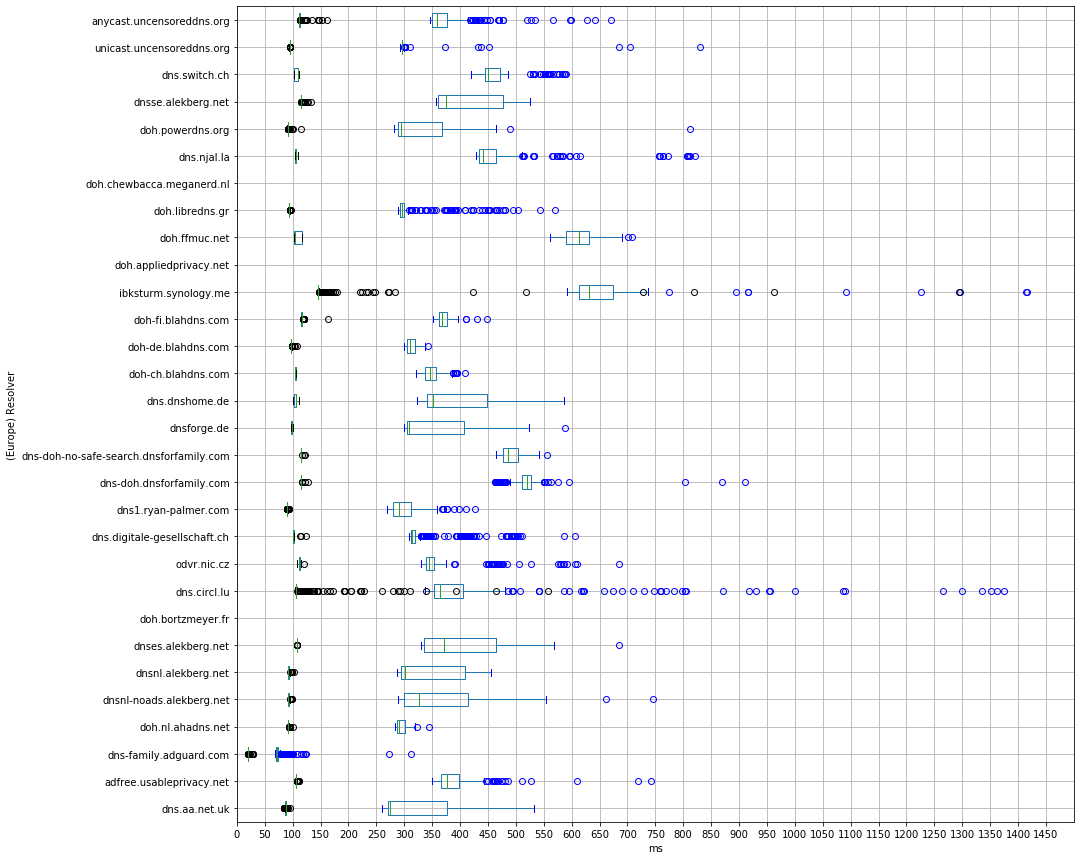

In [109]:
# Europe Boxplot for Response Time, Domain: Google
eur_array_of_resolvers = pd.Series(ip_europe['resolver']).unique()

eur_dict_resp_time_series={}
eur_length=len(eur_array_of_resolvers)

eur_google_resp=[0]*eur_length
eur_resp_time_series=[0]*eur_length
for i in range(eur_length):
    eur_google_resp[i]=df[(df['resolver']==eur_array_of_resolvers[i]) & (df['domain'] == 'google.com')]
    eur_resp_time_series[i]=(eur_google_resp[i]['rtime'])
    y_axis = eur_array_of_resolvers
    eur_temp = [s.replace("https://", "") for s in y_axis]
    eur_new_list = [s.replace("/dns-query", "") for s in eur_temp]
    eur_dict_resp_time_series[eur_new_list[i]]= eur_resp_time_series[i]
eur_frame_to_plot=pd.DataFrame(eur_dict_resp_time_series)


# Europe Boxplot for Ping Time

eur_dict_ping_series={}

import warnings
warnings.filterwarnings('ignore')

eur_google_ping=[0]*eur_length
eur_ping_series = [0]*eur_length
for i in range(eur_length):
    eur_google_ping[i]=df[(df['resolver']==eur_array_of_resolvers[i]) & (df['domain'] == 'google.com')]
    eur_ping_series[i]=(eur_google_ping[i]['ping_time'])
    y_axis = eur_array_of_resolvers
    eur_temp = [s.replace("https://", "") for s in y_axis]
    eur_new_list = [s.replace("/dns-query", "") for s in eur_temp]
    eur_dict_ping_series[eur_new_list[i]]= eur_ping_series[i]
eur_ping_frame_to_plot=pd.DataFrame(eur_dict_ping_series)
eur_ping = eur_ping_frame_to_plot

#Make two plots and merge
c = "blue"
eur_boxplot = eur_frame_to_plot.boxplot(vert=False,figsize=(15,15),showfliers=True, return_type='axes', manage_ticks=False,
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=c),
            )

eur_ping_boxplot = eur_ping.boxplot(vert=False,figsize=(15,15),showfliers=True, ax= eur_boxplot)


xl = 1500
plt.xlim(0,xl)
plt.xlabel('ms')
plt.ylabel('(Europe) Resolver')
plt.xticks(np.arange(0, xl, step=50))
plt.show()

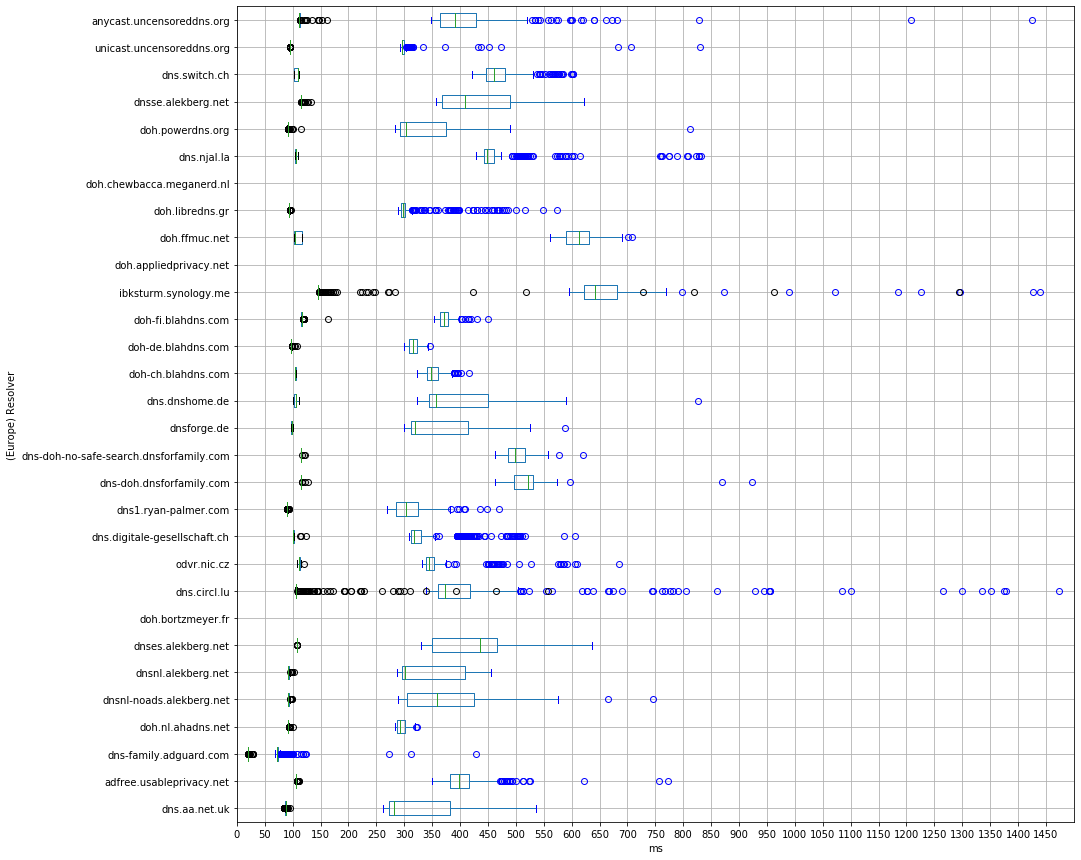

In [110]:
# Europe Boxplot for Response Time, Domain: Netflix
eur_array_of_resolvers = pd.Series(ip_europe['resolver']).unique()

eur_dict_resp_time_series={}
eur_length=len(eur_array_of_resolvers)

eur_netflix_resp=[0]*eur_length
eur_resp_time_series=[0]*eur_length
for i in range(eur_length):
    eur_netflix_resp[i]=df[(df['resolver']==eur_array_of_resolvers[i]) & (df['domain'] == 'netflix.com')]
    eur_resp_time_series[i]=(eur_netflix_resp[i]['rtime'])
    y_axis = eur_array_of_resolvers
    eur_temp = [s.replace("https://", "") for s in y_axis]
    eur_new_list = [s.replace("/dns-query", "") for s in eur_temp]
    eur_dict_resp_time_series[eur_new_list[i]]= eur_resp_time_series[i]
eur_frame_to_plot=pd.DataFrame(eur_dict_resp_time_series)


# Europe Boxplot for Ping Time

eur_dict_ping_series={}

import warnings
warnings.filterwarnings('ignore')

eur_netflix_ping=[0]*eur_length
eur_ping_series = [0]*eur_length
for i in range(eur_length):
    eur_netflix_ping[i]=df[(df['resolver']==eur_array_of_resolvers[i]) & (df['domain'] == 'google.com')]
    eur_ping_series[i]=(eur_netflix_ping[i]['ping_time'])
    y_axis = eur_array_of_resolvers
    eur_temp = [s.replace("https://", "") for s in y_axis]
    eur_new_list = [s.replace("/dns-query", "") for s in eur_temp]
    eur_dict_ping_series[eur_new_list[i]]= eur_ping_series[i]
eur_ping_frame_to_plot=pd.DataFrame(eur_dict_ping_series)
eur_ping = eur_ping_frame_to_plot

#Make two plots and merge
c = "blue"
eur_boxplot = eur_frame_to_plot.boxplot(vert=False,figsize=(15,15),showfliers=True, return_type='axes', manage_ticks=False,
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=c),
            )

eur_ping_boxplot = eur_ping.boxplot(vert=False,figsize=(15,15),showfliers=True, ax= eur_boxplot)


xl = 1500
plt.xlim(0,xl)
plt.xlabel('ms')
plt.ylabel('(Europe) Resolver')
plt.xticks(np.arange(0, xl, step=50))
plt.show()

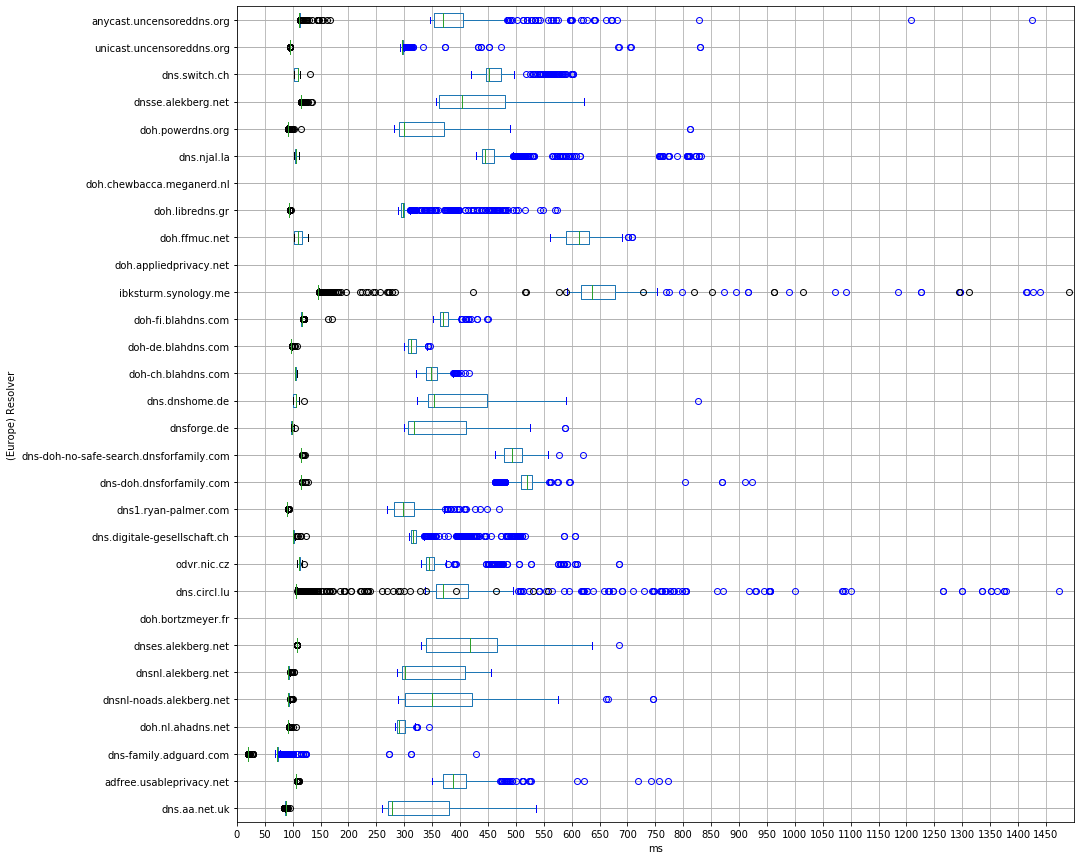

In [111]:
# Europe Boxplot for Response Time, Domain: Netflix and Google 
eur_array_of_resolvers = pd.Series(ip_europe['resolver']).unique()

eur_dict_resp_time_series={}
eur_length=len(eur_array_of_resolvers)

eur_both_resp=[0]*eur_length
eur_resp_time_series=[0]*eur_length
for i in range(eur_length):
    eur_both_resp[i]=df[(df['resolver']==eur_array_of_resolvers[i])]
    eur_resp_time_series[i]=(eur_both_resp[i]['rtime'])
    y_axis = eur_array_of_resolvers
    eur_temp = [s.replace("https://", "") for s in y_axis]
    eur_new_list = [s.replace("/dns-query", "") for s in eur_temp]
    eur_dict_resp_time_series[eur_new_list[i]]= eur_resp_time_series[i]
eur_frame_to_plot=pd.DataFrame(eur_dict_resp_time_series)


# Europe Boxplot for Ping Time

eur_dict_ping_series={}

import warnings
warnings.filterwarnings('ignore')

eur_both_ping=[0]*eur_length
eur_ping_series = [0]*eur_length
for i in range(eur_length):
    eur_both_ping[i]=df[(df['resolver']==eur_array_of_resolvers[i])]
    eur_ping_series[i]=(eur_both_ping[i]['ping_time'])
    y_axis = eur_array_of_resolvers
    eur_temp = [s.replace("https://", "") for s in y_axis]
    eur_new_list = [s.replace("/dns-query", "") for s in eur_temp]
    eur_dict_ping_series[eur_new_list[i]]= eur_ping_series[i]
eur_ping_frame_to_plot=pd.DataFrame(eur_dict_ping_series)
eur_ping = eur_ping_frame_to_plot

#Make two plots and merge
c = "blue"
eur_boxplot = eur_frame_to_plot.boxplot(vert=False,figsize=(15,15),showfliers=True, return_type='axes',capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=c),medianprops=dict(color=c))

eur_ping_boxplot = eur_ping.boxplot(vert=False,figsize=(15,15),showfliers=True, ax= eur_boxplot)


xl = 1500
plt.xlim(0,xl)
plt.xlabel('ms')
plt.ylabel('(Europe) Resolver')
plt.xticks(np.arange(0, xl, step=50))
plt.grid(True)
plt.savefig("Europe_Netflix_&_Google.png")
plt.show()

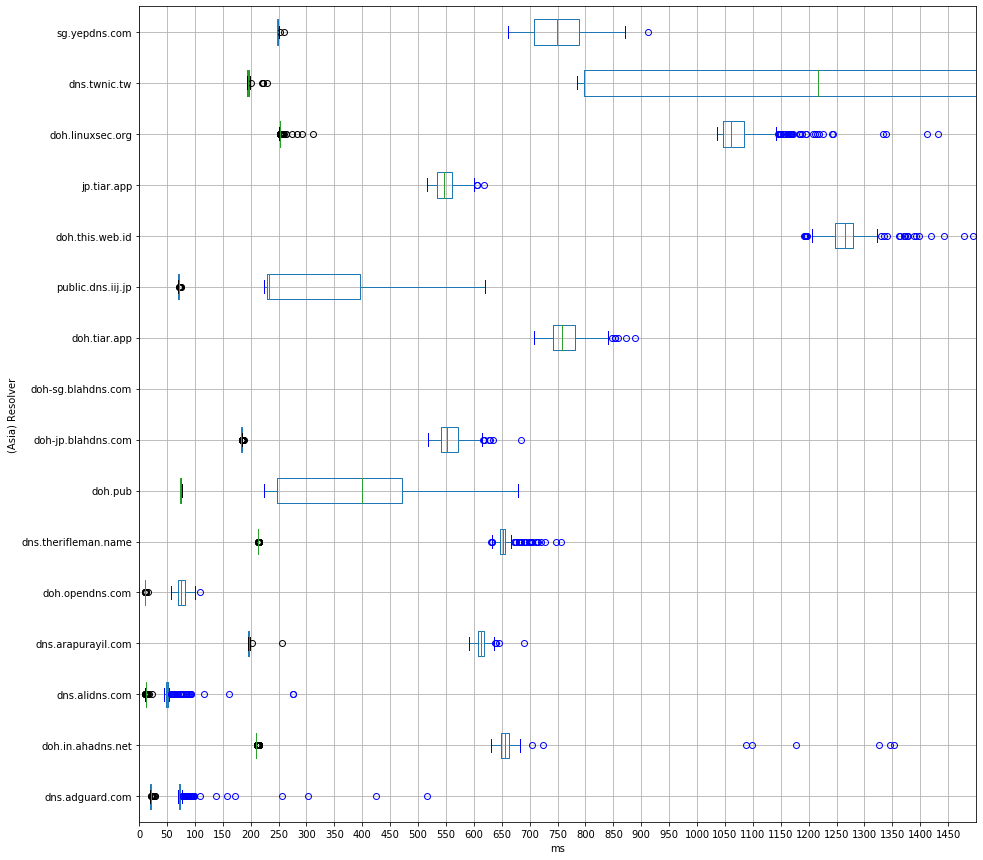

In [112]:
# Asia Boxplot for Response Time, Domain: Google
asia_array_of_resolvers = pd.Series(ip_asia['resolver']).unique()

asia_dict_resp_time_series={}
asia_length=len(asia_array_of_resolvers)

asia_google_resp=[0]*asia_length
asia_resp_time_series=[0]*asia_length
for i in range(asia_length):
    asia_google_resp[i]=df[(df['resolver']==asia_array_of_resolvers[i]) & (df['domain'] == 'google.com')]
    asia_resp_time_series[i]=(asia_google_resp[i]['rtime'])
    y_axis = asia_array_of_resolvers
    asia_temp = [s.replace("https://", "") for s in y_axis]
    asia_new_list = [s.replace("/dns-query", "") for s in asia_temp]
    asia_dict_resp_time_series[asia_new_list[i]]= asia_resp_time_series[i]
asia_frame_to_plot=pd.DataFrame(asia_dict_resp_time_series)


# Asia Boxplot for Ping Time

asia_dict_ping_series={}

import warnings
warnings.filterwarnings('ignore')

asia_google_ping=[0]*asia_length
asia_ping_series = [0]*asia_length
for i in range(asia_length):
    asia_google_ping[i]=df[(df['resolver']==asia_array_of_resolvers[i]) & (df['domain'] == 'google.com')]
    asia_ping_series[i]=(asia_google_ping[i]['ping_time'])
    y_axis = asia_array_of_resolvers
    asia_temp = [s.replace("https://", "") for s in y_axis]
    asia_new_list = [s.replace("/dns-query", "") for s in asia_temp]
    asia_dict_ping_series[asia_new_list[i]]= asia_ping_series[i]
asia_ping_frame_to_plot=pd.DataFrame(asia_dict_ping_series)
asia_ping = asia_ping_frame_to_plot

#Make two plots and merge
c = "blue"
asia_boxplot = asia_frame_to_plot.boxplot(vert=False,figsize=(15,15),showfliers=True, return_type='axes', manage_ticks=False,
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=c),
            )

asia_ping_boxplot = asia_ping.boxplot(vert=False,figsize=(15,15),showfliers=True, ax= asia_boxplot)


xl = 1500
plt.xlim(0,xl)
plt.xlabel('ms')
plt.ylabel('(Asia) Resolver')
plt.xticks(np.arange(0, xl, step=50))
plt.grid(True)
plt.savefig("Asia_Google.png")
plt.show()

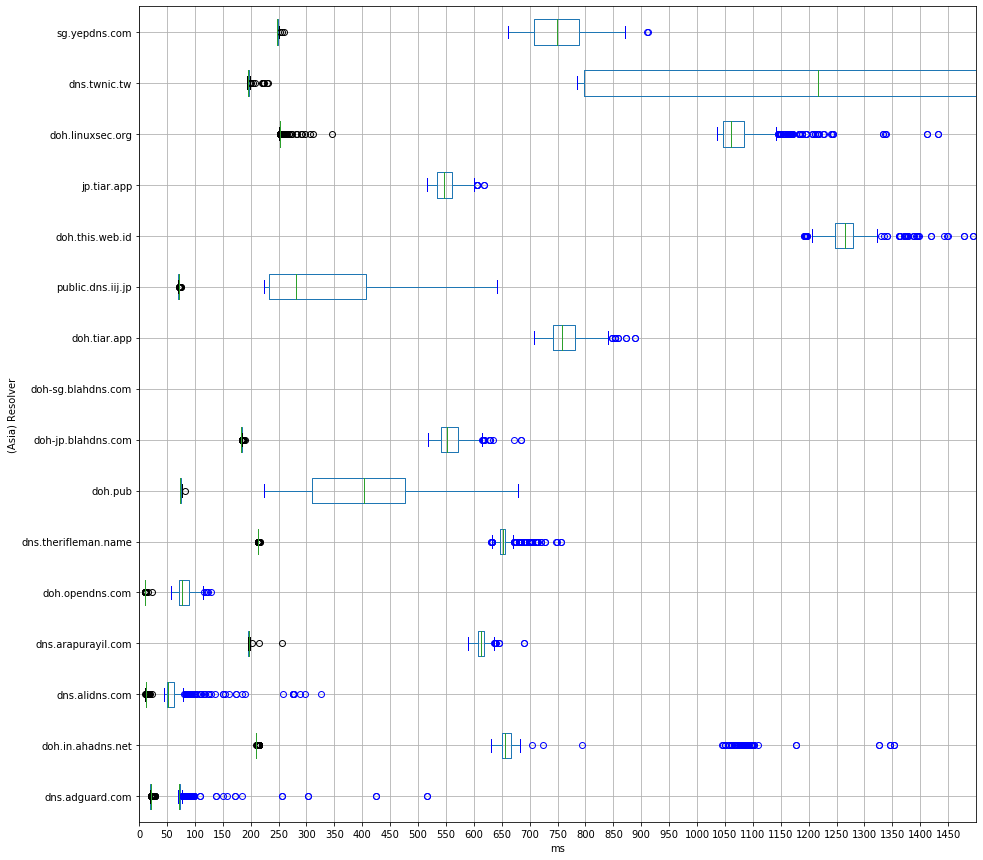

In [113]:
# Asia Boxplot for Response Time, Domain: Google & Netflix
asia_array_of_resolvers = pd.Series(ip_asia['resolver']).unique()

asia_dict_resp_time_series={}
asia_length=len(asia_array_of_resolvers)

asia_both_resp=[0]*asia_length
asia_resp_time_series=[0]*asia_length
for i in range(asia_length):
    asia_both_resp[i]=df[(df['resolver']==asia_array_of_resolvers[i])]
    asia_resp_time_series[i]=(asia_both_resp[i]['rtime'])
    y_axis = asia_array_of_resolvers
    asia_temp = [s.replace("https://", "") for s in y_axis]
    asia_new_list = [s.replace("/dns-query", "") for s in asia_temp]
    asia_dict_resp_time_series[asia_new_list[i]]= asia_resp_time_series[i]
asia_frame_to_plot=pd.DataFrame(asia_dict_resp_time_series)


# Asia Boxplot for Ping Time

asia_dict_ping_series={}

import warnings
warnings.filterwarnings('ignore')

asia_both_ping=[0]*asia_length
asia_ping_series = [0]*asia_length
for i in range(asia_length):
    asia_both_ping[i]=df[(df['resolver']==asia_array_of_resolvers[i])]
    asia_ping_series[i]=(asia_both_ping[i]['ping_time'])
    y_axis = asia_array_of_resolvers
    asia_temp = [s.replace("https://", "") for s in y_axis]
    asia_new_list = [s.replace("/dns-query", "") for s in asia_temp]
    asia_dict_ping_series[asia_new_list[i]]= asia_ping_series[i]
asia_ping_frame_to_plot=pd.DataFrame(asia_dict_ping_series)
asia_ping = asia_ping_frame_to_plot

#Make two plots and merge
c = "blue"
asia_boxplot = asia_frame_to_plot.boxplot(vert=False,figsize=(15,15),showfliers=True, return_type='axes', manage_ticks=False,
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=c),
            )

asia_ping_boxplot = asia_ping.boxplot(vert=False,figsize=(15,15),showfliers=True, ax= asia_boxplot)


xl = 1500
plt.xlim(0,xl)
plt.xlabel('ms')
plt.ylabel('(Asia) Resolver')
plt.xticks(np.arange(0, xl, step=50))
plt.grid(True)
plt.savefig("Asia_Google_&_Netflix.png")
plt.show()

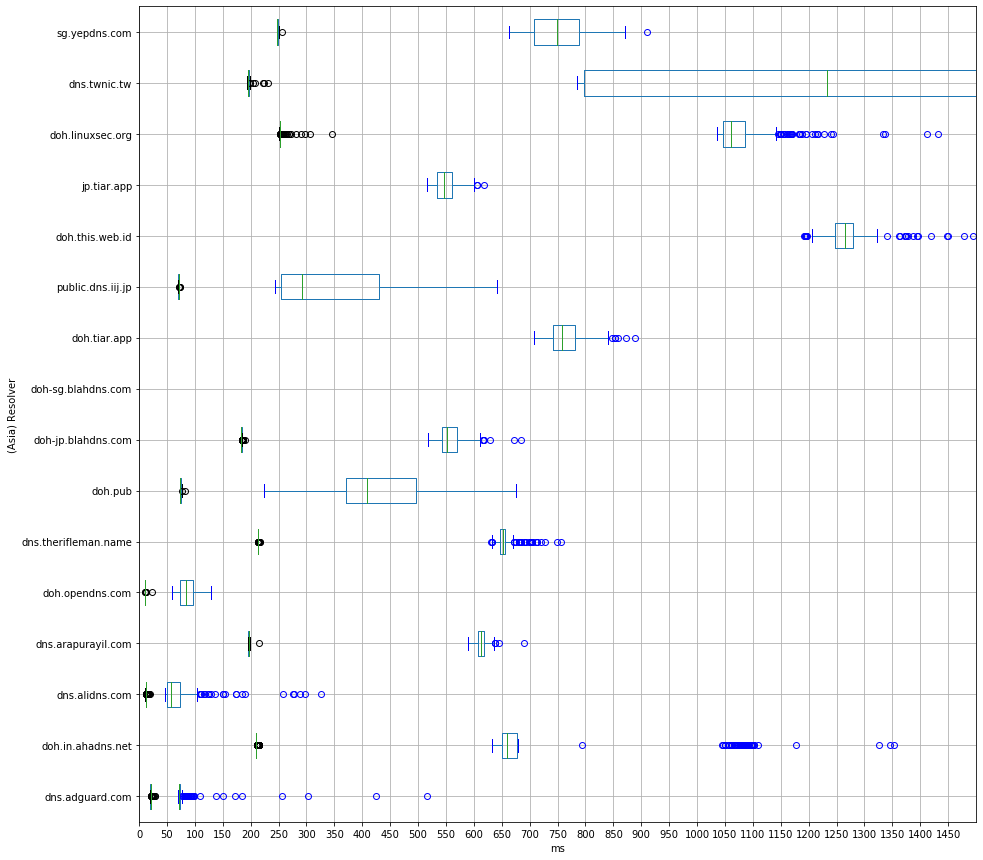

In [114]:
# Asia Boxplot for Response Time, Domain: Netflix
asia_array_of_resolvers = pd.Series(ip_asia['resolver']).unique()

asia_dict_resp_time_series={}
asia_length=len(asia_array_of_resolvers)

asia_netflix_resp=[0]*asia_length
asia_resp_time_series=[0]*asia_length
for i in range(asia_length):
    asia_netflix_resp[i]=df[(df['resolver']==asia_array_of_resolvers[i]) & (df['domain'] == 'netflix.com')]
    asia_resp_time_series[i]=(asia_netflix_resp[i]['rtime'])
    y_axis = asia_array_of_resolvers
    asia_temp = [s.replace("https://", "") for s in y_axis]
    asia_new_list = [s.replace("/dns-query", "") for s in asia_temp]
    asia_dict_resp_time_series[asia_new_list[i]]= asia_resp_time_series[i]
asia_frame_to_plot=pd.DataFrame(asia_dict_resp_time_series)


# Asia Boxplot for Ping Time

asia_dict_ping_series={}

import warnings
warnings.filterwarnings('ignore')

asia_netflix_ping=[0]*asia_length
asia_ping_series = [0]*asia_length
for i in range(asia_length):
    asia_netflix_ping[i]=df[(df['resolver']==asia_array_of_resolvers[i]) & (df['domain'] == 'netflix.com')]
    asia_ping_series[i]=(asia_netflix_ping[i]['ping_time'])
    y_axis = asia_array_of_resolvers
    asia_temp = [s.replace("https://", "") for s in y_axis]
    asia_new_list = [s.replace("/dns-query", "") for s in asia_temp]
    asia_dict_ping_series[asia_new_list[i]]= asia_ping_series[i]
asia_ping_frame_to_plot=pd.DataFrame(asia_dict_ping_series)
asia_ping = asia_ping_frame_to_plot

#Make two plots and merge
c = "blue"
asia_boxplot = asia_frame_to_plot.boxplot(vert=False,figsize=(15,15),showfliers=True, return_type='axes', manage_ticks=False,
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=c),
            )

asia_ping_boxplot = asia_ping.boxplot(vert=False,figsize=(15,15),showfliers=True, ax= asia_boxplot)


xl = 1500
plt.xlim(0,xl)
plt.xlabel('ms')
plt.ylabel('(Asia) Resolver')
plt.xticks(np.arange(0, xl, step=50))
plt.grid(True)
plt.savefig("Asia_Netflix.png")
plt.show()

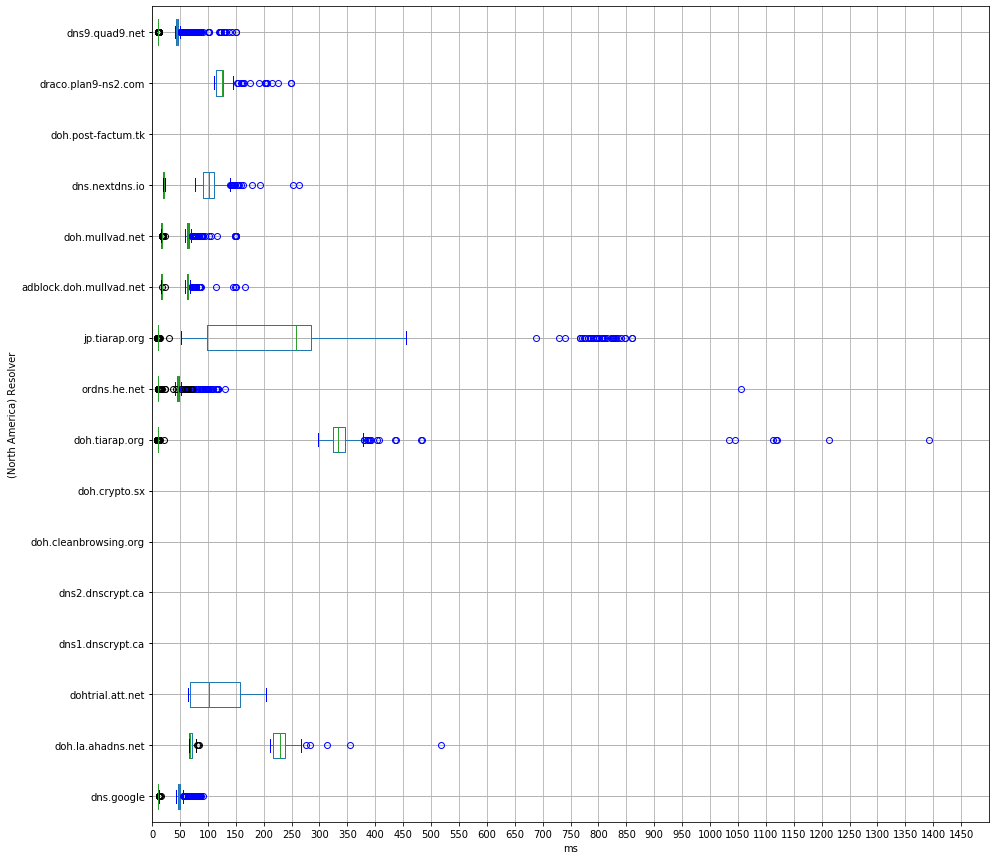

In [115]:
# North America Boxplot for Response Time, Domain: Google
NA_array_of_resolvers = pd.Series(ip_north_america['resolver']).unique()

NA_dict_resp_time_series={}
NA_length=len(NA_array_of_resolvers)

NA_google_resp=[0]*NA_length
NA_resp_time_series=[0]*NA_length

for i in range(NA_length):
    NA_google_resp[i]=df[(df['resolver']==NA_array_of_resolvers[i]) & (df['domain'] == 'google.com')]
    NA_resp_time_series[i]=(NA_google_resp[i]['rtime'])
    y_axis = NA_array_of_resolvers
    NA_temp = [s.replace("https://", "") for s in y_axis]
    NA_new_list = [s.replace("/dns-query", "") for s in NA_temp]
    NA_dict_resp_time_series[NA_new_list[i]]= NA_resp_time_series[i]
NA_frame_to_plot=pd.DataFrame(NA_dict_resp_time_series)


# North America Boxplot for Ping Time

NA_dict_ping_series={}

import warnings
warnings.filterwarnings('ignore')

NA_google_ping=[0]*NA_length
NA_ping_series = [0]*NA_length
for i in range(NA_length):
    NA_google_ping[i]=df[(df['resolver']==NA_array_of_resolvers[i]) & (df['domain'] == 'google.com')]
    NA_ping_series[i]=(NA_google_ping[i]['ping_time'])
    y_axis = NA_array_of_resolvers
    NA_temp = [s.replace("https://", "") for s in y_axis]
    NA_new_list = [s.replace("/dns-query", "") for s in NA_temp]
    NA_dict_ping_series[NA_new_list[i]]= NA_ping_series[i]
NA_ping_frame_to_plot=pd.DataFrame(NA_dict_ping_series)
NA_ping = NA_ping_frame_to_plot
#Make two plots and merge
c = "blue"
NA_boxplot = NA_frame_to_plot.boxplot(vert=False,figsize=(15,15),showfliers=True, return_type='axes',capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=c),
            )

NA_ping_boxplot = NA_ping.boxplot(vert=False,figsize=(15,15),showfliers=True, ax= NA_boxplot)


xl = 1500
plt.xlim(0,xl)
plt.xlabel('ms')
plt.ylabel('(North America) Resolver')
plt.xticks(np.arange(0, xl, step=50))
plt.grid(True)
plt.savefig("NA_Google.png")
plt.show()

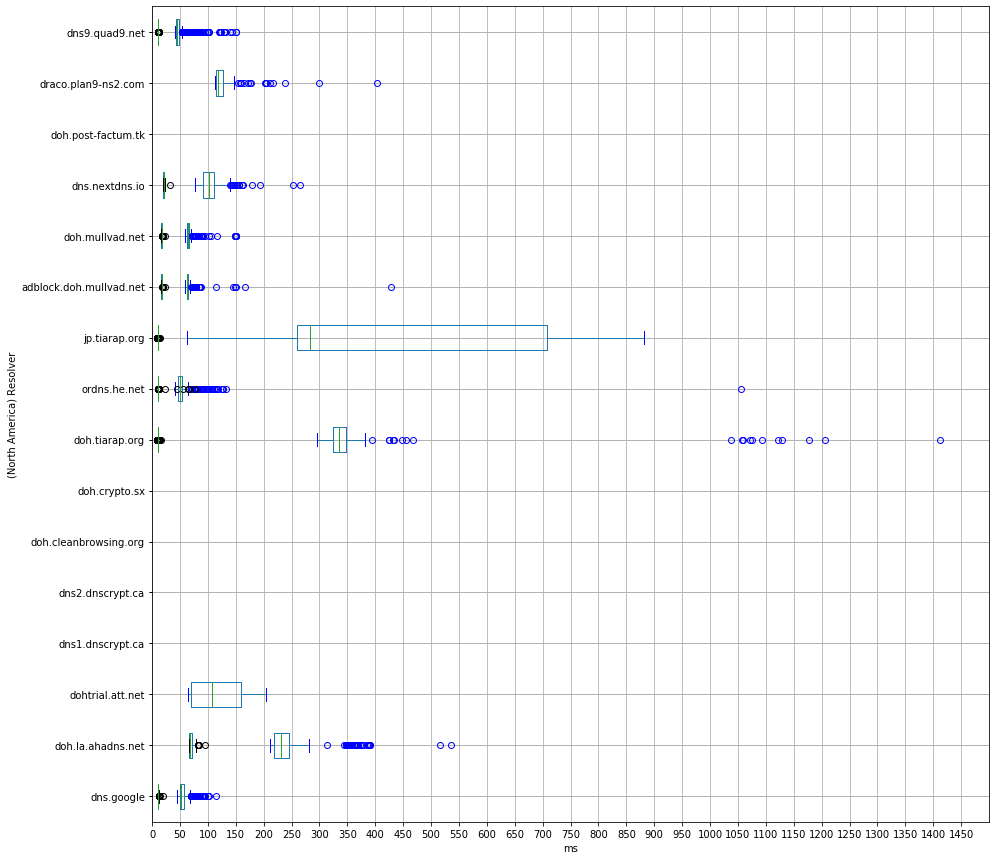

In [116]:
# North America Boxplot for Response Time, Domain: Netflix
NA_array_of_resolvers = pd.Series(ip_north_america['resolver']).unique()

NA_dict_resp_time_series={}
NA_length=len(NA_array_of_resolvers)

NA_netflix_resp=[0]*NA_length
NA_resp_time_series=[0]*NA_length

for i in range(NA_length):
    NA_netflix_resp[i]=df[(df['resolver']==NA_array_of_resolvers[i]) & (df['domain'] == 'netflix.com')]
    NA_resp_time_series[i]=(NA_netflix_resp[i]['rtime'])
    y_axis = NA_array_of_resolvers
    NA_temp = [s.replace("https://", "") for s in y_axis]
    NA_new_list = [s.replace("/dns-query", "") for s in NA_temp]
    NA_dict_resp_time_series[NA_new_list[i]]= NA_resp_time_series[i]
NA_frame_to_plot=pd.DataFrame(NA_dict_resp_time_series)


# North America Boxplot for Ping Time

NA_dict_ping_series={}

import warnings
warnings.filterwarnings('ignore')

NA_netflix_ping=[0]*NA_length
NA_ping_series = [0]*NA_length
for i in range(NA_length):
    NA_netflix_ping[i]=df[(df['resolver']==NA_array_of_resolvers[i]) & (df['domain'] == 'netflix.com')]
    NA_ping_series[i]=(NA_netflix_ping[i]['ping_time'])
    y_axis = NA_array_of_resolvers
    NA_temp = [s.replace("https://", "") for s in y_axis]
    NA_new_list = [s.replace("/dns-query", "") for s in NA_temp]
    NA_dict_ping_series[NA_new_list[i]]= NA_ping_series[i]
NA_ping_frame_to_plot=pd.DataFrame(NA_dict_ping_series)
NA_ping = NA_ping_frame_to_plot
#Make two plots and merge
c = "blue"
NA_boxplot = NA_frame_to_plot.boxplot(vert=False,figsize=(15,15),showfliers=True, return_type='axes',capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=c),
            )

NA_ping_boxplot = NA_ping.boxplot(vert=False,figsize=(15,15),showfliers=True, ax= NA_boxplot)


xl = 1500
plt.xlim(0,xl)
plt.xlabel('ms')
plt.ylabel('(North America) Resolver')
plt.xticks(np.arange(0, xl, step=50))
plt.grid(True)
plt.savefig("NA_Netflix.png")
plt.show()

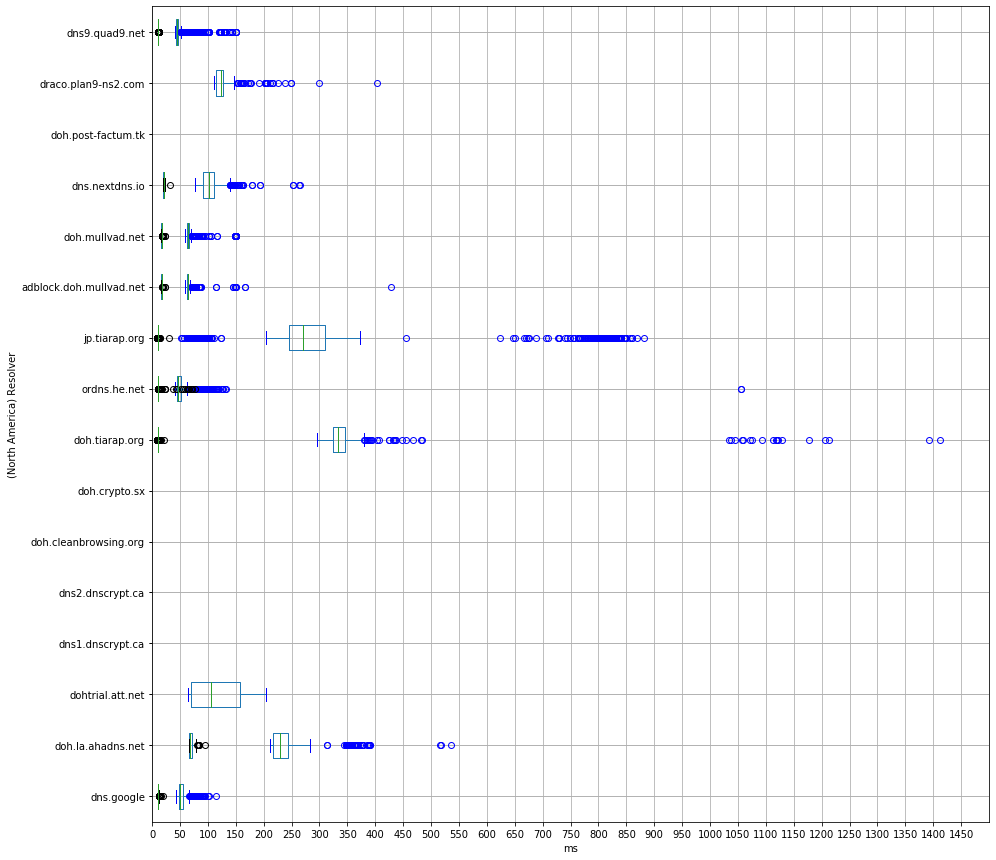

In [117]:
# North America Boxplot for Response Time, Domain: Google and Netflix
NA_array_of_resolvers = pd.Series(ip_north_america['resolver']).unique()

NA_dict_resp_time_series={}
NA_length=len(NA_array_of_resolvers)

NA_both_resp=[0]*NA_length
NA_resp_time_series=[0]*NA_length

for i in range(NA_length):
    NA_both_resp[i]=df[(df['resolver']==NA_array_of_resolvers[i])]
    NA_resp_time_series[i]=(NA_both_resp[i]['rtime'])
    y_axis = NA_array_of_resolvers
    NA_temp = [s.replace("https://", "") for s in y_axis]
    NA_new_list = [s.replace("/dns-query", "") for s in NA_temp]
    NA_dict_resp_time_series[NA_new_list[i]]= NA_resp_time_series[i]
NA_frame_to_plot=pd.DataFrame(NA_dict_resp_time_series)


# North America Boxplot for Ping Time

NA_dict_ping_series={}

import warnings
warnings.filterwarnings('ignore')

NA_both_ping=[0]*NA_length
NA_ping_series = [0]*NA_length
for i in range(NA_length):
    NA_both_ping[i]=df[(df['resolver']==NA_array_of_resolvers[i])]
    NA_ping_series[i]=(NA_both_ping[i]['ping_time'])
    y_axis = NA_array_of_resolvers
    NA_temp = [s.replace("https://", "") for s in y_axis]
    NA_new_list = [s.replace("/dns-query", "") for s in NA_temp]
    NA_dict_ping_series[NA_new_list[i]]= NA_ping_series[i]
NA_ping_frame_to_plot=pd.DataFrame(NA_dict_ping_series)
NA_ping = NA_ping_frame_to_plot
#Make two plots and merge
c = "blue"
NA_boxplot = NA_frame_to_plot.boxplot(vert=False,figsize=(15,15),showfliers=True, return_type='axes',capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=c),
            )

NA_ping_boxplot = NA_ping.boxplot(vert=False,figsize=(15,15),showfliers=True, ax= NA_boxplot)


xl = 1500
plt.xlim(0,xl)
plt.xlabel('ms')
plt.ylabel('(North America) Resolver')
plt.xticks(np.arange(0, xl, step=50))
plt.grid(True)
plt.savefig("NA_Google_&_Netflix.png")
plt.show()

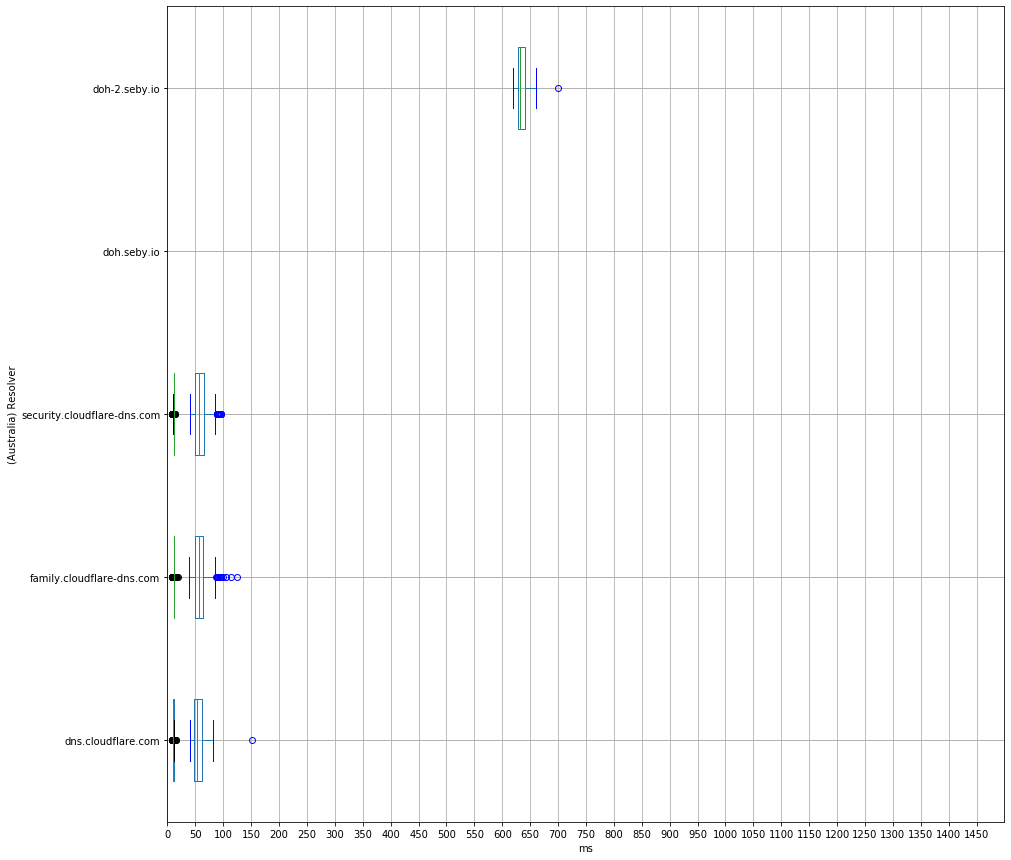

In [118]:
# Australia Boxplot for Response Time, Domain: Google
aus_array_of_resolvers = pd.Series(ip_australia['resolver']).unique()

aus_dict_resp_time_series={}
aus_length=len(aus_array_of_resolvers)

aus_google_resp=[0]*aus_length
aus_resp_time_series=[0]*aus_length

for i in range(aus_length):
    aus_google_resp[i]=df[(df['resolver']==aus_array_of_resolvers[i]) & (df['domain'] == 'google.com')]
    aus_resp_time_series[i]=(aus_google_resp[i]['rtime'])
    y_axis = aus_array_of_resolvers
    aus_temp = [s.replace("https://", "") for s in y_axis]
    aus_new_list = [s.replace("/dns-query", "") for s in aus_temp]
    aus_dict_resp_time_series[aus_new_list[i]]= aus_resp_time_series[i]
aus_frame_to_plot=pd.DataFrame(aus_dict_resp_time_series)


# Australia Boxplot for Ping Time

aus_dict_ping_series={}

import warnings
warnings.filterwarnings('ignore')

aus_google_ping=[0]*aus_length
aus_ping_series = [0]*aus_length
for i in range(aus_length):
    aus_google_ping[i]=df[(df['resolver']==aus_array_of_resolvers[i]) & (df['domain'] == 'google.com')]
    aus_ping_series[i]=(aus_google_ping[i]['ping_time'])
    y_axis = aus_array_of_resolvers
    aus_temp = [s.replace("https://", "") for s in y_axis]
    aus_new_list = [s.replace("/dns-query", "") for s in aus_temp]
    aus_dict_ping_series[aus_new_list[i]]= aus_ping_series[i]
aus_ping_frame_to_plot=pd.DataFrame(aus_dict_ping_series)
aus_ping = aus_ping_frame_to_plot
#Make two plots and merge
c = "blue"
aus_boxplot = aus_frame_to_plot.boxplot(vert=False,figsize=(15,15),showfliers=True, return_type='axes',capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=c),
            )

aus_ping_boxplot = aus_ping.boxplot(vert=False,figsize=(15,15),showfliers=True, ax= aus_boxplot)


xl = 1500
plt.xlim(0,xl)
plt.xlabel('ms')
plt.ylabel('(Australia) Resolver')
plt.xticks(np.arange(0, xl, step=50))
plt.grid(True)
plt.savefig("aus_Google.png")
plt.show()

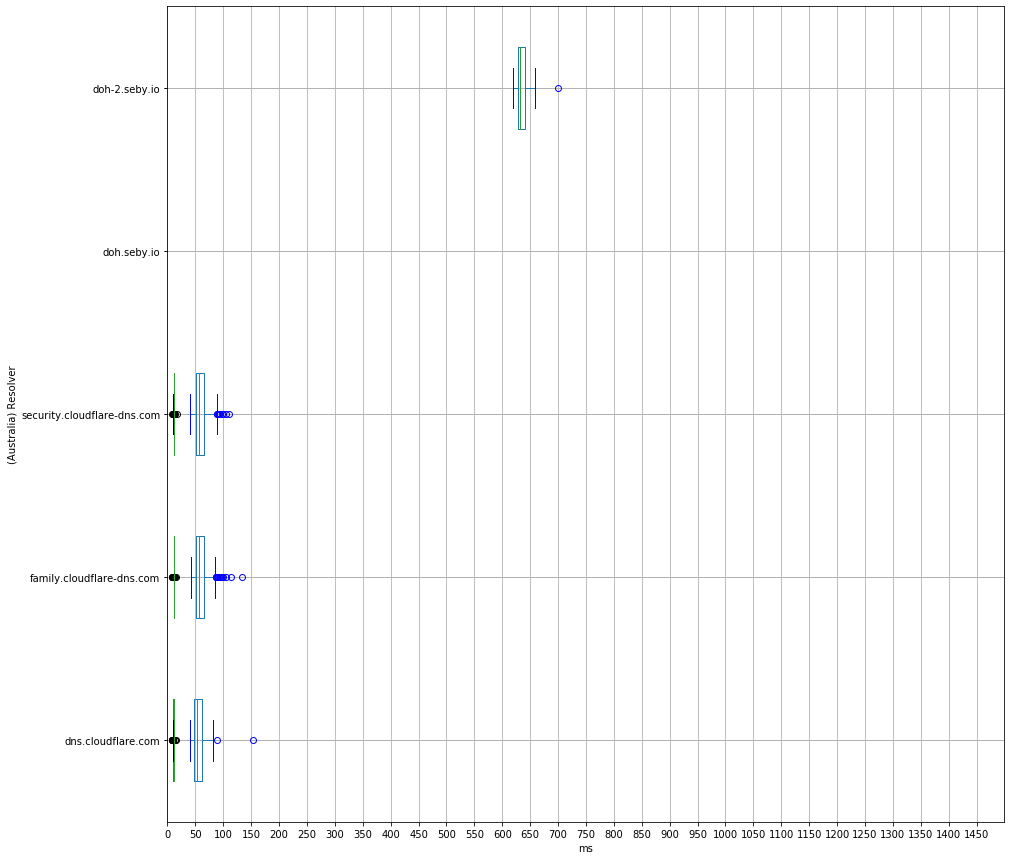

In [119]:
# Australia Boxplot for Response Time, Domain: Google
aus_array_of_resolvers = pd.Series(ip_australia['resolver']).unique()

aus_dict_resp_time_series={}
aus_length=len(aus_array_of_resolvers)

aus_netflix_resp=[0]*aus_length
aus_resp_time_series=[0]*aus_length

for i in range(aus_length):
    aus_netflix_resp[i]=df[(df['resolver']==aus_array_of_resolvers[i]) & (df['domain'] == 'netflix.com')]
    aus_resp_time_series[i]=(aus_netflix_resp[i]['rtime'])
    y_axis = aus_array_of_resolvers
    aus_temp = [s.replace("https://", "") for s in y_axis]
    aus_new_list = [s.replace("/dns-query", "") for s in aus_temp]
    aus_dict_resp_time_series[aus_new_list[i]]= aus_resp_time_series[i]
aus_frame_to_plot=pd.DataFrame(aus_dict_resp_time_series)


# Australia Boxplot for Ping Time

aus_dict_ping_series={}

import warnings
warnings.filterwarnings('ignore')

aus_netflix_ping=[0]*aus_length
aus_ping_series = [0]*aus_length
for i in range(aus_length):
    aus_netflix_ping[i]=df[(df['resolver']==aus_array_of_resolvers[i]) & (df['domain'] == 'netflix.com')]
    aus_ping_series[i]=(aus_netflix_ping[i]['ping_time'])
    y_axis = aus_array_of_resolvers
    aus_temp = [s.replace("https://", "") for s in y_axis]
    aus_new_list = [s.replace("/dns-query", "") for s in aus_temp]
    aus_dict_ping_series[aus_new_list[i]]= aus_ping_series[i]
aus_ping_frame_to_plot=pd.DataFrame(aus_dict_ping_series)
aus_ping = aus_ping_frame_to_plot
#Make two plots and merge
c = "blue"
aus_boxplot = aus_frame_to_plot.boxplot(vert=False,figsize=(15,15),showfliers=True, return_type='axes',capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=c),
            )

aus_ping_boxplot = aus_ping.boxplot(vert=False,figsize=(15,15),showfliers=True, ax= aus_boxplot)


xl = 1500
plt.xlim(0,xl)
plt.xlabel('ms')
plt.ylabel('(Australia) Resolver')
plt.xticks(np.arange(0, xl, step=50))
plt.grid(True)
plt.savefig("aus_Netflix.png")
plt.show()

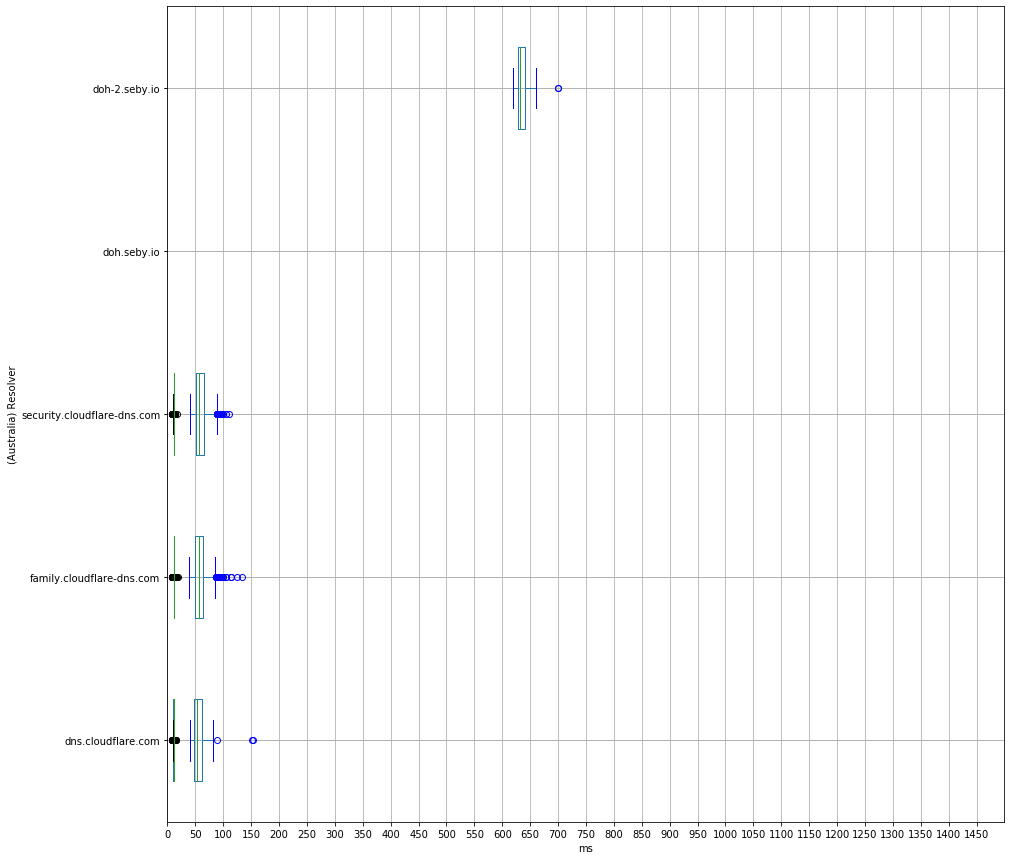

In [120]:
# Australia Boxplot for Response Time, Domain: Google and Netflix
aus_array_of_resolvers = pd.Series(ip_australia['resolver']).unique()

aus_dict_resp_time_series={}
aus_length=len(aus_array_of_resolvers)

aus_both_resp=[0]*aus_length
aus_resp_time_series=[0]*aus_length

for i in range(aus_length):
    aus_both_resp[i]=df[(df['resolver']==aus_array_of_resolvers[i])]
    aus_resp_time_series[i]=(aus_both_resp[i]['rtime'])
    y_axis = aus_array_of_resolvers
    aus_temp = [s.replace("https://", "") for s in y_axis]
    aus_new_list = [s.replace("/dns-query", "") for s in aus_temp]
    aus_dict_resp_time_series[aus_new_list[i]]= aus_resp_time_series[i]
aus_frame_to_plot=pd.DataFrame(aus_dict_resp_time_series)


# Australia Boxplot for Ping Time

aus_dict_ping_series={}

import warnings
warnings.filterwarnings('ignore')

aus_both_ping=[0]*aus_length
aus_ping_series = [0]*aus_length
for i in range(aus_length):
    aus_both_ping[i]=df[(df['resolver']==aus_array_of_resolvers[i])]
    aus_ping_series[i]=(aus_both_ping[i]['ping_time'])
    y_axis = aus_array_of_resolvers
    aus_temp = [s.replace("https://", "") for s in y_axis]
    aus_new_list = [s.replace("/dns-query", "") for s in aus_temp]
    aus_dict_ping_series[aus_new_list[i]]= aus_ping_series[i]
aus_ping_frame_to_plot=pd.DataFrame(aus_dict_ping_series)
aus_ping = aus_ping_frame_to_plot
#Make two plots and merge
c = "blue"
aus_boxplot = aus_frame_to_plot.boxplot(vert=False,figsize=(15,15),showfliers=True, return_type='axes',capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=c),
            )

aus_ping_boxplot = aus_ping.boxplot(vert=False,figsize=(15,15),showfliers=True, ax= aus_boxplot)


xl = 1500
plt.xlim(0,xl)
plt.xlabel('ms')
plt.ylabel('(Australia) Resolver')
plt.xticks(np.arange(0, xl, step=50))
plt.grid(True)
plt.savefig("aus_Netflix_&_Google.png")
plt.show()